# spark foundation
# task 3:Prediction using Decision Tree


In [184]:
import pandas as pd # importing the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
iris=pd.read_csv("iris.csv")

In [186]:
iris.shape

(150, 6)

In [187]:
iris.head(50)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [188]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [189]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [190]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [191]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [192]:
ir=iris["Species"].value_counts()

In [193]:
ir

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [194]:
row_indexes=iris[iris['Species']=="Iris-setosa"].index

In [195]:
iris.loc[row_indexes,'target']=0

In [196]:
row_indexes=iris[iris['Species']=="Iris-versicolor"].index

In [197]:
iris.loc[row_indexes,'target']=1

In [198]:
row_indexes=iris[iris['Species']=="Iris-virginica"].index

In [199]:
iris.loc[row_indexes,'target']=2

In [200]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [201]:
iris=iris.drop("Species",1)

In [202]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
target           0
dtype: int64

In [203]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0
146,147,6.3,2.5,5.0,1.9,2.0
147,148,6.5,3.0,5.2,2.0,2.0
148,149,6.2,3.4,5.4,2.3,2.0


In [206]:
iris["Target"]=iris["target"].astype(int)

In [207]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target,Target
0,1,5.1,3.5,1.4,0.2,0.0,0
1,2,4.9,3.0,1.4,0.2,0.0,0
2,3,4.7,3.2,1.3,0.2,0.0,0
3,4,4.6,3.1,1.5,0.2,0.0,0
4,5,5.0,3.6,1.4,0.2,0.0,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0,2
146,147,6.3,2.5,5.0,1.9,2.0,2
147,148,6.5,3.0,5.2,2.0,2.0,2
148,149,6.2,3.4,5.4,2.3,2.0,2


In [208]:
iris=iris.drop("target",1)

In [209]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [210]:
iris=iris.drop("Id",1)

In [211]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [212]:
x = iris.iloc[:, [1, 2, 3, 4]].values

In [213]:
x

array([[3.5, 1.4, 0.2, 0. ],
       [3. , 1.4, 0.2, 0. ],
       [3.2, 1.3, 0.2, 0. ],
       [3.1, 1.5, 0.2, 0. ],
       [3.6, 1.4, 0.2, 0. ],
       [3.9, 1.7, 0.4, 0. ],
       [3.4, 1.4, 0.3, 0. ],
       [3.4, 1.5, 0.2, 0. ],
       [2.9, 1.4, 0.2, 0. ],
       [3.1, 1.5, 0.1, 0. ],
       [3.7, 1.5, 0.2, 0. ],
       [3.4, 1.6, 0.2, 0. ],
       [3. , 1.4, 0.1, 0. ],
       [3. , 1.1, 0.1, 0. ],
       [4. , 1.2, 0.2, 0. ],
       [4.4, 1.5, 0.4, 0. ],
       [3.9, 1.3, 0.4, 0. ],
       [3.5, 1.4, 0.3, 0. ],
       [3.8, 1.7, 0.3, 0. ],
       [3.8, 1.5, 0.3, 0. ],
       [3.4, 1.7, 0.2, 0. ],
       [3.7, 1.5, 0.4, 0. ],
       [3.6, 1. , 0.2, 0. ],
       [3.3, 1.7, 0.5, 0. ],
       [3.4, 1.9, 0.2, 0. ],
       [3. , 1.6, 0.2, 0. ],
       [3.4, 1.6, 0.4, 0. ],
       [3.5, 1.5, 0.2, 0. ],
       [3.4, 1.4, 0.2, 0. ],
       [3.2, 1.6, 0.2, 0. ],
       [3.1, 1.6, 0.2, 0. ],
       [3.4, 1.5, 0.4, 0. ],
       [4.1, 1.5, 0.1, 0. ],
       [4.2, 1.4, 0.2, 0. ],
       [3.1, 1

In [214]:

y=iris.Target
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int32


In [219]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(min_samples_split=5)
model.fit(x,y)

print('Decision Tree Classifer is Created')

Decision Tree Classifer is Created


In [220]:
from sklearn.tree import  DecisionTreeClassifier
help(DecisionTreeClassifier)


Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

Text(0.5, 1.0, 'Decision Tree')

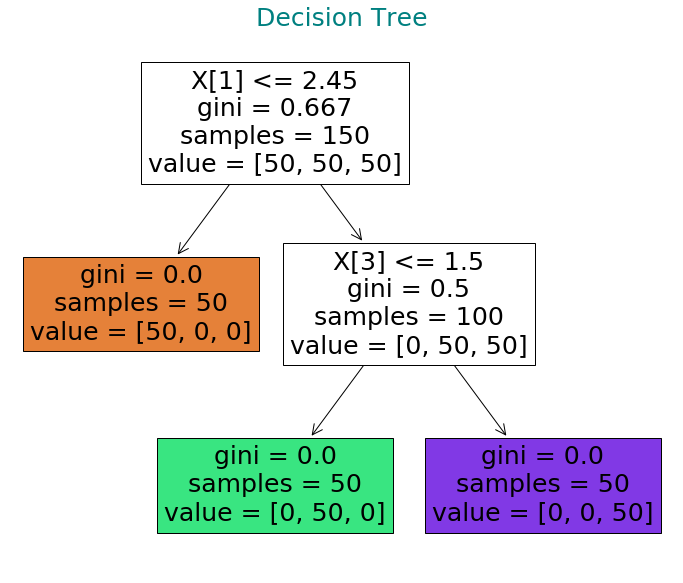

In [221]:
from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(model , filled  =True)
plt.title("Decision Tree", fontsize = 25, Color = 'Teal')